In [5]:
import numpy as np
import matplotlib.pyplot as plt


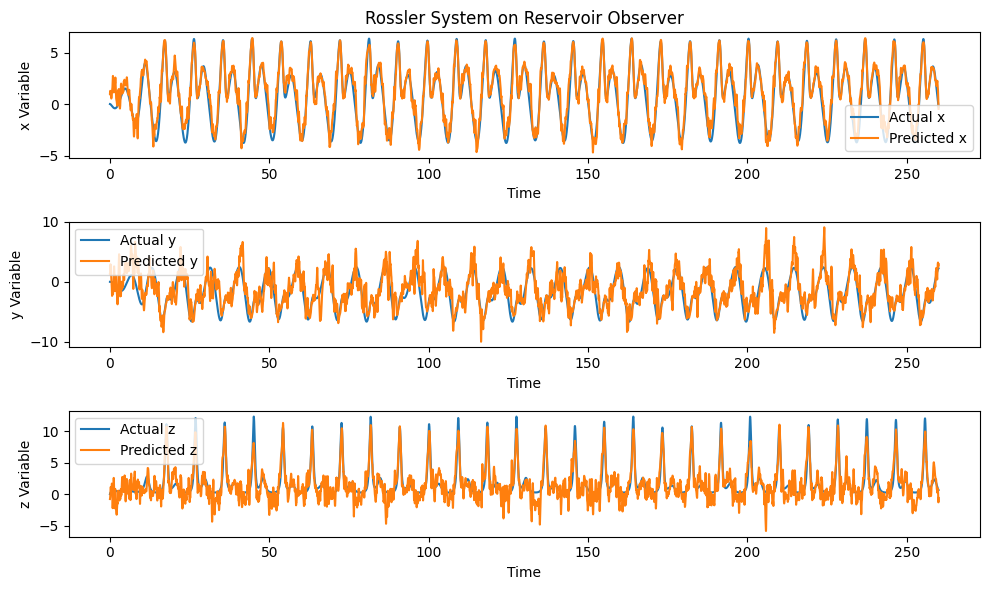

In [34]:
###Rossler System
class ReservoirObserver:
    def __init__(self, d, alpha=1.0, bias=1.0):
        self.d = d
        self.alpha = alpha
        self.bias = bias  
        self.A = np.random.rand(d, d) - 0.5  
        self.W_in = np.ones((d, 1))  
        self.W_out = np.random.rand(1, d) - 0.5  
        self.r = np.zeros((d, 1))  

    def reservoir_dynamics(self, u):
        self.r = (1 - self.alpha) * self.r + self.alpha * np.tanh(np.dot(self.A, self.r) + np.dot(self.W_in, u) + self.bias)  # Include bias here
        return self.r

    def train(self, u, y):
        T = len(u)
        R = np.zeros((self.d, T))

        for t in range(T):
            self.reservoir_dynamics(u[t])
            R[:, t] = self.r[:, 0]

        # Linear regression to find the output weights
        self.W_out = np.dot(np.dot(y, R.T), np.linalg.inv(np.dot(R, R.T)))

    def predict(self, u):
        T = len(u)
        y_hat = np.zeros(T)

        for t in range(T):
            self.reservoir_dynamics(u[t])
            y_hat[t] = np.dot(self.W_out, self.r)

        return y_hat

#Simulate Rossler system
def rossler(t, X, a=0.5, b=2.0, c=4.0, dt=0.01):
    x, y, z = X
    x_dot = -y - z
    y_dot = x + a * y
    z_dot = b + z * (x - c)
    return np.array([x + x_dot * dt, y + y_dot * dt, z + z_dot * dt])

#Simulation Parameters
T = 260
dt = 0.01
t = np.arange(0, T, dt)
X_sim = np.zeros((3, len(t)))
X = np.array([0.0, 0.0, 0.0])

for i in range(len(t)):
    X_sim[:, i] = X
    X = rossler(t[i], X)  # Use Euler's method for integration

#Create Reservoir Observer Object 
d = 400
alpha = 0.1
bias = 1.0

reservoir_observer_x = ReservoirObserver(d=d, alpha=alpha, bias=bias)
reservoir_observer_y = ReservoirObserver(d=d, alpha=alpha, bias=bias)
reservoir_observer_z = ReservoirObserver(d=d, alpha=alpha, bias=bias)

#Define the input (u) as X_sim[0] for each variable
U_x = X_sim[0, :]
U_y = X_sim[0, :]
U_z = X_sim[0, :]

#Define the targets (Y) for each variable
Y_x = X_sim[0, :]
Y_y = X_sim[1, :]
Y_z = X_sim[2, :]

#Train the reservoir observers for each variable
reservoir_observer_x.train(U_x, Y_x)
reservoir_observer_y.train(U_y, Y_y)
reservoir_observer_z.train(U_z, Y_z)

#Predict the unmeasured state variable for each variable
Y_hat_x = reservoir_observer_x.predict(U_x)
Y_hat_y = reservoir_observer_y.predict(U_y)
Y_hat_z = reservoir_observer_z.predict(U_z)

#Plot the results for each variable
plt.figure(figsize=(10, 6))

plt.subplot(311)
plt.plot(t, Y_x, label='Actual x')
plt.plot(t, Y_hat_x, label='Predicted x')
plt.legend()
plt.xlabel('Time')
plt.ylabel('x Variable')
plt.title("Rossler System on Reservoir Observer")

plt.subplot(312)
plt.plot(t, Y_y, label='Actual y')
plt.plot(t, Y_hat_y, label='Predicted y')
plt.legend()
plt.xlabel('Time')
plt.ylabel('y Variable')

plt.subplot(313)
plt.plot(t, Y_z, label='Actual z')
plt.plot(t, Y_hat_z, label='Predicted z')
plt.legend()
plt.xlabel('Time')
plt.ylabel('z Variable')

plt.tight_layout()
plt.show()

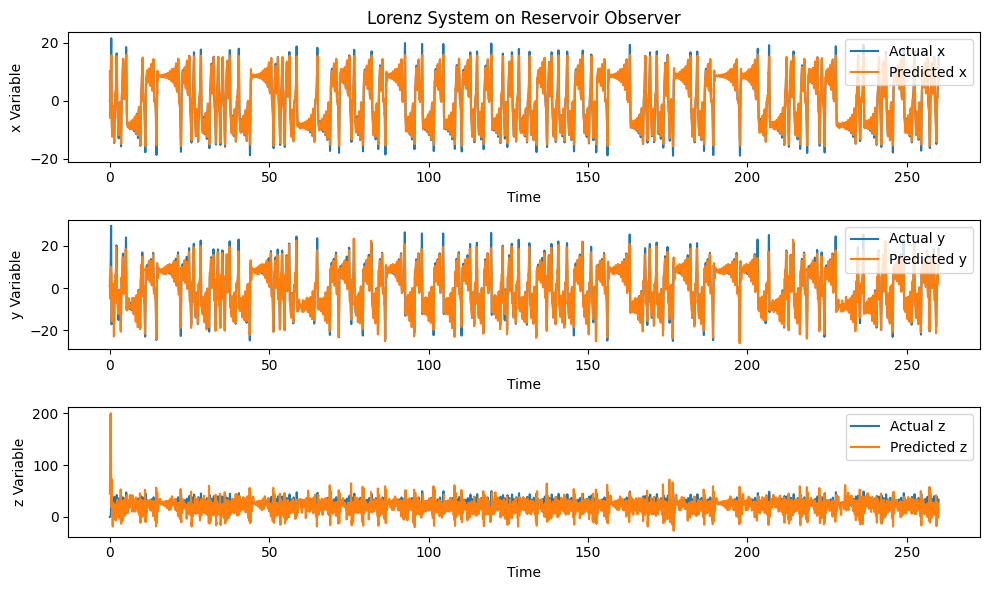

In [36]:
###Lorenz System
class ReservoirObserver:
    def __init__(self, d, alpha=1.0, bias=1.0):
        self.d = d
        self.alpha = alpha
        self.bias = bias  
        self.A = np.random.rand(d, d) - 0.5  
        self.W_in = np.ones((d, 1))  
        self.W_out = np.random.rand(1, d) - 0.5  
        self.r = np.zeros((d, 1))  

    def reservoir_dynamics(self, u):
        self.r = (1 - self.alpha) * self.r + self.alpha * np.tanh(np.dot(self.A, self.r) + np.dot(self.W_in, u) + self.bias)  # Include bias here
        return self.r

    def train(self, u, y):
        T = len(u)
        R = np.zeros((self.d, T))

        for t in range(T):
            self.reservoir_dynamics(u[t])
            R[:, t] = self.r[:, 0]

        # Linear regression to find the output weights
        self.W_out = np.dot(np.dot(y, R.T), np.linalg.inv(np.dot(R, R.T)))

    def predict(self, u):
        T = len(u)
        y_hat = np.zeros(T)

        for t in range(T):
            self.reservoir_dynamics(u[t])
            y_hat[t] = np.dot(self.W_out, self.r)

        return y_hat

#Simulate Lorenz system
def lorenz(t, X, sigma=10.0, rho=28.0, beta=8.0/3.0, dt=0.01):
    x, y, z = X
    x_dot = sigma * (y - x)
    y_dot = x * (rho - z) - y
    z_dot = x * y - beta * z
    return np.array([x + x_dot * dt, y + y_dot * dt, z + z_dot * dt])

T = 260
t = np.arange(0, T, dt)
X_sim = np.zeros((3, len(t)))
X = np.array([0.0, 1.0, 0.0])  # Initial conditions for the Lorenz system

for i in range(len(t)):
    X_sim[:, i] = X
    X = lorenz(t[i], X)  # Use Euler's method for integration

#Create Reservoir Observer Object 
d = 400
alpha = 0.1
bias = 1.0

reservoir_observer_x = ReservoirObserver(d=d, alpha=alpha, bias=bias)
reservoir_observer_y = ReservoirObserver(d=d, alpha=alpha, bias=bias)
reservoir_observer_z = ReservoirObserver(d=d, alpha=alpha, bias=bias)

#Define the input (u) as X_sim[0] for each variable
U_x = X_sim[0, :]
U_y = X_sim[0, :]
U_z = X_sim[0, :]

#Define the targets (Y) for each variable
Y_x = X_sim[0, :]
Y_y = X_sim[1, :]
Y_z = X_sim[2, :]

#Train the reservoir observers for each variable
reservoir_observer_x.train(U_x, Y_x)
reservoir_observer_y.train(U_y, Y_y)
reservoir_observer_z.train(U_z, Y_z)

#Predict the unmeasured state variable for each variable
Y_hat_x = reservoir_observer_x.predict(U_x)
Y_hat_y = reservoir_observer_y.predict(U_y)
Y_hat_z = reservoir_observer_z.predict(U_z)

#Plot the results for each variable
plt.figure(figsize=(10, 6))

plt.subplot(311)
plt.plot(t, Y_x, label='Actual x')
plt.plot(t, Y_hat_x, label='Predicted x')
plt.legend()
plt.xlabel('Time')
plt.ylabel('x Variable')
plt.title("Lorenz System on Reservoir Observer")

plt.subplot(312)
plt.plot(t, Y_y, label='Actual y')
plt.plot(t, Y_hat_y, label='Predicted y')
plt.legend()
plt.xlabel('Time')
plt.ylabel('y Variable')

plt.subplot(313)
plt.plot(t, Y_z, label='Actual z')
plt.plot(t, Y_hat_z, label='Predicted z')
plt.legend()
plt.xlabel('Time')
plt.ylabel('z Variable')

plt.tight_layout()
plt.show()